In [425]:
import pandas as pd
import datetime
from sklearn.preprocessing import StandardScaler  # Scaling features for regression
import statsmodels.api as sm  # Building and summarizing regression models
from sklearn.preprocessing import StandardScaler  # Scaling features for regression
import matplotlib.pyplot as plt
import seaborn as sns # Advanced data visualizations
import numpy as np

In [426]:
# read prepared data
df_umsatz = pd.read_csv("../0_DataPreparation/Data/model_train_20130701_20180731.csv", parse_dates=['Datum'])
print(df_umsatz.head())

        id      Datum      Umsatz  KielerWoche  weekend_or_holiday  \
0  1307011 2013-07-01  148.828353            0                   0   
1  1307021 2013-07-02  159.793757            0                   0   
2  1307031 2013-07-03  111.885594            0                   0   
3  1307041 2013-07-04  168.864941            0                   0   
4  1307051 2013-07-05  171.280754            0                   0   

   wetter_regen  wetter_schnee  wetter_gewitter  wetter_dunst  wetter_nebel  \
0             0              0                0             0             0   
1             0              0                0             0             0   
2             1              0                0             0             0   
3             0              0                0             0             0   
4             0              0                0             0             0   

   ...  Monat_May  Monat_November  Monat_October  Monat_September  is_Montag  \
0  ...          0       

In [427]:
# Clean up data and drop duplicate columns
"""print(df_umsatz.columns)
columns_to_drop = ["temp_bin_Kalt", "temp_bin_Moderat", "temp_bin_Warm"]
df_umsatz.drop(columns=columns_to_drop, inplace=True)"""
print(df_umsatz.columns)

Index(['id', 'Datum', 'Umsatz', 'KielerWoche', 'weekend_or_holiday',
       'wetter_regen', 'wetter_schnee', 'wetter_gewitter', 'wetter_dunst',
       'wetter_nebel', 'temp_bin_Kalt', 'temp_bin_Moderat', 'temp_bin_Warm',
       'wind_bin_windstill', 'wind_bin_moderat', 'wind_bin_sturm',
       'cloud_Bin_sonnig', 'cloud_Bin_moderat', 'cloud_Bin_bedeckt',
       'is_silvester', 'inflation', 'Warengruppe_Broetchen',
       'Warengruppe_Brot', 'Warengruppe_Croissant', 'Warengruppe_Konditorei',
       'Warengruppe_Kuchen', 'Warengruppe_Saisonbrot', 'Monat_April',
       'Monat_August', 'Monat_December', 'Monat_February', 'Monat_January',
       'Monat_July', 'Monat_June', 'Monat_March', 'Monat_May',
       'Monat_November', 'Monat_October', 'Monat_September', 'is_Montag',
       'is_Dienstag', 'is_Mittwoch', 'is_Donnerstag', 'is_Freitag',
       'is_Samstag'],
      dtype='object')


In [428]:
# Check for missing values
df_umsatz.isna().any()

id                        False
Datum                     False
Umsatz                    False
KielerWoche               False
weekend_or_holiday        False
wetter_regen              False
wetter_schnee             False
wetter_gewitter           False
wetter_dunst              False
wetter_nebel              False
temp_bin_Kalt             False
temp_bin_Moderat          False
temp_bin_Warm             False
wind_bin_windstill        False
wind_bin_moderat          False
wind_bin_sturm            False
cloud_Bin_sonnig          False
cloud_Bin_moderat         False
cloud_Bin_bedeckt         False
is_silvester              False
inflation                 False
Warengruppe_Broetchen     False
Warengruppe_Brot          False
Warengruppe_Croissant     False
Warengruppe_Konditorei    False
Warengruppe_Kuchen        False
Warengruppe_Saisonbrot    False
Monat_April               False
Monat_August              False
Monat_December            False
Monat_February            False
Monat_Ja

In [429]:
# select features and target variable
features = [i for i in df_umsatz.columns if i not in ["id","Datum","Umsatz"]]
X = df_umsatz[features]
Y = df_umsatz["Umsatz"]
# Scale the 'inflation' column to standardize the range
scaler = StandardScaler()
df_umsatz['inflation'] = scaler.fit_transform(df_umsatz[['inflation']])
print(df_umsatz.head())


        id      Datum      Umsatz  KielerWoche  weekend_or_holiday  \
0  1307011 2013-07-01  148.828353            0                   0   
1  1307021 2013-07-02  159.793757            0                   0   
2  1307031 2013-07-03  111.885594            0                   0   
3  1307041 2013-07-04  168.864941            0                   0   
4  1307051 2013-07-05  171.280754            0                   0   

   wetter_regen  wetter_schnee  wetter_gewitter  wetter_dunst  wetter_nebel  \
0             0              0                0             0             0   
1             0              0                0             0             0   
2             1              0                0             0             0   
3             0              0                0             0             0   
4             0              0                0             0             0   

   ...  Monat_May  Monat_November  Monat_October  Monat_September  is_Montag  \
0  ...          0       

In [431]:
# Convert the 'Datum' column to datetime
df_umsatz['Datum'] = pd.to_datetime(df_umsatz['Datum'])

# Split the DataFrame into test and train data
df_umsatz_train = df_umsatz[df_umsatz['Datum'] <= '2017-07-31']
df_umsatz_test = df_umsatz[(df_umsatz['Datum'] > '2017-07-31') & (df_umsatz['Datum'] <= '2018-07-31')]
df_umsatz_test = df_umsatz_test.reset_index(drop=True)
df_umsatz_train

,id,Datum,Umsatz,KielerWoche,weekend_or_holiday,wetter_regen,wetter_schnee,wetter_gewitter,wetter_dunst,wetter_nebel,...,Monat_May,Monat_November,Monat_October,Monat_September,is_Montag,is_Dienstag,is_Mittwoch,is_Donnerstag,is_Freitag,is_Samstag
0,1307011,2013-07-01,148.828353,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1307021,2013-07-02,159.793757,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1307031,2013-07-03,111.885594,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1307041,2013-07-04,168.864941,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1307051,2013-07-05,171.280754,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9273,1612226,2016-12-22,54.322960,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9274,1612236,2016-12-23,133.499200,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
9275,1612246,2016-12-24,39.577538,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9276,1612276,2016-12-27,48.890718,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [432]:
df_umsatz_test

,id,Datum,Umsatz,KielerWoche,weekend_or_holiday,wetter_regen,wetter_schnee,wetter_gewitter,wetter_dunst,wetter_nebel,...,Monat_May,Monat_November,Monat_October,Monat_September,is_Montag,is_Dienstag,is_Mittwoch,is_Donnerstag,is_Freitag,is_Samstag
0,1708011,2017-08-01,166.135486,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1708021,2017-08-02,155.022099,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1708031,2017-08-03,159.575340,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1708041,2017-08-04,161.585239,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1708051,2017-08-05,198.088094,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,1712216,2017-12-21,87.471228,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1837,1712226,2017-12-22,71.911652,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1838,1712236,2017-12-23,84.062223,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1839,1712246,2017-12-24,60.981969,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [433]:
X_test = sm.add_constant(df_umsatz_test[features], has_constant='add')  # Add constant to test set for predictions
X_test

,const,KielerWoche,weekend_or_holiday,wetter_regen,wetter_schnee,wetter_gewitter,wetter_dunst,wetter_nebel,temp_bin_Kalt,temp_bin_Moderat,...,Monat_May,Monat_November,Monat_October,Monat_September,is_Montag,is_Dienstag,is_Mittwoch,is_Donnerstag,is_Freitag,is_Samstag
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,1.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,1.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1837,1.0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1838,1.0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1839,1.0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [434]:
X_train = sm.add_constant(df_umsatz_train[features])
X_train

,const,KielerWoche,weekend_or_holiday,wetter_regen,wetter_schnee,wetter_gewitter,wetter_dunst,wetter_nebel,temp_bin_Kalt,temp_bin_Moderat,...,Monat_May,Monat_November,Monat_October,Monat_September,is_Montag,is_Dienstag,is_Mittwoch,is_Donnerstag,is_Freitag,is_Samstag
0,1.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,1.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9273,1.0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9274,1.0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
9275,1.0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9276,1.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [435]:
# Train the linear regression model using Statsmodels
model = sm.OLS(df_umsatz_train["Umsatz"], X_train).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     643.5
Date:                Tue, 07 Jan 2025   Prob (F-statistic):               0.00
Time:                        15:47:11   Log-Likelihood:                -42693.
No. Observations:                7493   AIC:                         8.546e+04
Df Residuals:                    7455   BIC:                         8.573e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     65

In [436]:
# Make predictions on the test set
predictions = model.predict(X_test)
print("Predictions for test data:", predictions)

Predictions for test data: 0       187.429802
1       186.205281
2       184.739946
3       193.847781
4       240.034096
           ...    
1836     51.342222
1837     64.474606
1838     99.146465
1839    107.255261
1840     46.449511
Length: 1841, dtype: float64


In [437]:
# Calculate Mean Absolute Percentage Error (MAPE) for error evaluation
mape = (abs((df_umsatz_test["Umsatz"] - predictions) / df_umsatz_test["Umsatz"]).mean()) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Percentage Error (MAPE): 33.57%


/tmp/ipykernel_3136/3071136976.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([df_umsatz_test.Umsatz.min(), df_umsatz_test.Umsatz.max()], [df_umsatz_test.Umsatz.min(), df_umsatz_test.Umsatz.max()], 'k--', color="red")


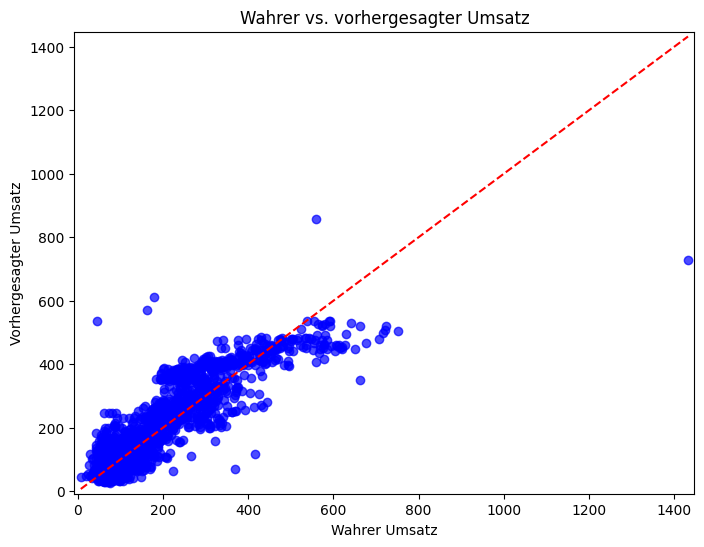

In [438]:
# Scatter plot: Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(df_umsatz_test.Umsatz, predictions, alpha=0.7, color="blue")
plt.plot([df_umsatz_test.Umsatz.min(), df_umsatz_test.Umsatz.max()], [df_umsatz_test.Umsatz.min(), df_umsatz_test.Umsatz.max()], 'k--', color="red")

plt.xlim([df_umsatz_test.Umsatz.min()-15, df_umsatz_test.Umsatz.max()+15])
plt.ylim([df_umsatz_test.Umsatz.min()-15, df_umsatz_test.Umsatz.max()+15])

plt.xlabel("Wahrer Umsatz")
plt.ylabel("Vorhergesagter Umsatz")
plt.title("Wahrer vs. vorhergesagter Umsatz")
plt.show()

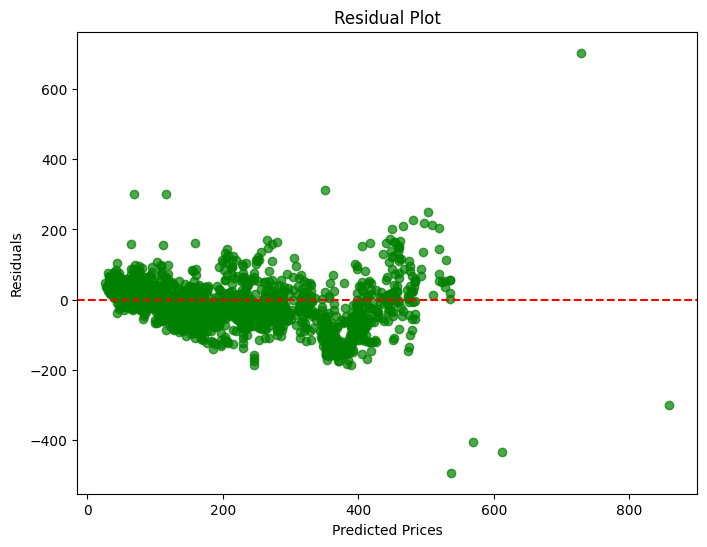

In [439]:
# Calculate residuals (differences between actual and predicted values)
residuals = df_umsatz_test["Umsatz"] - predictions

# Residual plot: Predicted Prices vs. Residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.7, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

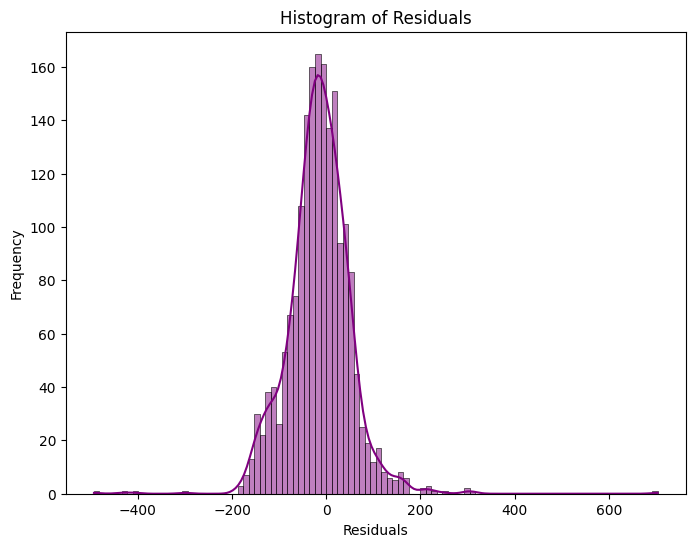

In [440]:
# Histogram of residuals to check normality
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="purple")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

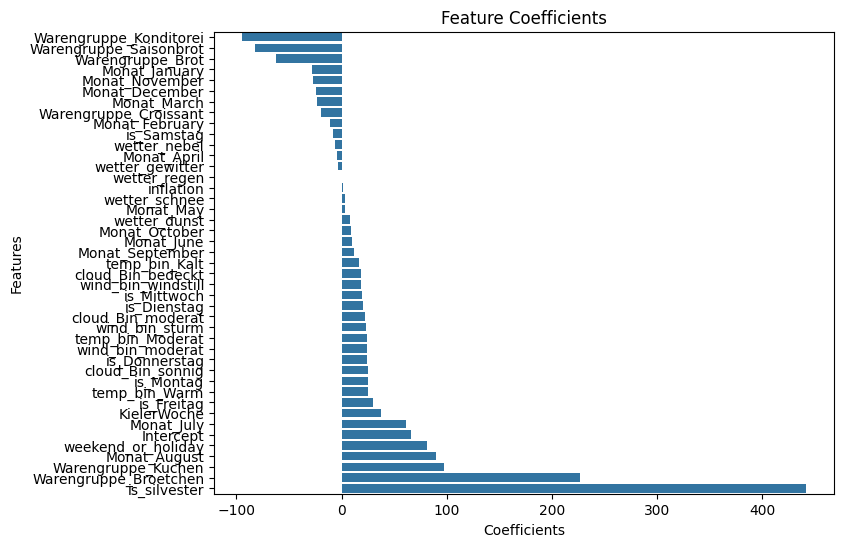

In [441]:
# Create a DataFrame of model coefficients
coefficients = pd.DataFrame({
    'Feature': ['Intercept'] + features,
    'Coefficient': model.params
})

# Bar plot of feature coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients.sort_values('Coefficient', ascending=True))
plt.title("Feature Coefficients")
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.show()

***Experimenting with different Models***

Ridge Regression with Hyperparameter Tuning

In [442]:
# Import necessary libraries
import pandas as pd  # For data manipulation
from sklearn.model_selection import train_test_split, GridSearchCV  # Train-test split and hyperparameter tuning
from sklearn.linear_model import Ridge  # Ridge Regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Evaluation metrics)

In [443]:
# Add a constant term to the training data for the regression intercept
X_train = sm.add_constant(df_umsatz_train[features])
y_train = df_umsatz_train["Umsatz"]

# Initialize Ridge Regression model
ridge = Ridge()

# Define hyperparameter grid for alpha (regularization strength)
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 40, 50, 100, 200]  # Testing a range of regularization strengths
}

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1)

# Train Ridge Regression model using GridSearchCV
grid_search.fit(X_train, y_train)

# Output the best hyperparameters from the grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Retrieve the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
predictions2 = best_model.predict(X_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Hyperparameters: {'alpha': 50}


In [444]:
# Calculate error metrics
mae = mean_absolute_error(df_umsatz_test["Umsatz"], predictions2)  # Mean Absolute Error
mse = mean_squared_error(df_umsatz_test["Umsatz"], predictions2)  # Mean Squared Error
mape = (abs((df_umsatz_test["Umsatz"] - predictions2) / df_umsatz_test["Umsatz"]).mean()) * 100  # Mean Absolute Percentage Error

# Output evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 48.47
Mean Squared Error (MSE): 4592.93
Mean Absolute Percentage Error (MAPE): 33.05%


In [445]:
from sklearn.metrics import r2_score

def calc_adj_r2(y_true, y_pred, n_features):
    n = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - ((1-r2)*(n-1)/(n-n_features-1))
    return adj_r2

# Berechne adjusted R² für Ridge Model
y_pred = best_model.predict(X_test)
adj_r2 = calc_adj_r2(df_umsatz_test["Umsatz"], y_pred, len(features))
print(f"Adjusted R² für Ridge Model: {adj_r2:.4f}")

Adjusted R² für Ridge Model: 0.7222


/tmp/ipykernel_3136/1494559498.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([df_umsatz_test.Umsatz.min(), df_umsatz_test.Umsatz.max()], [df_umsatz_test.Umsatz.min(), df_umsatz_test.Umsatz.max()], 'k--', color="red")


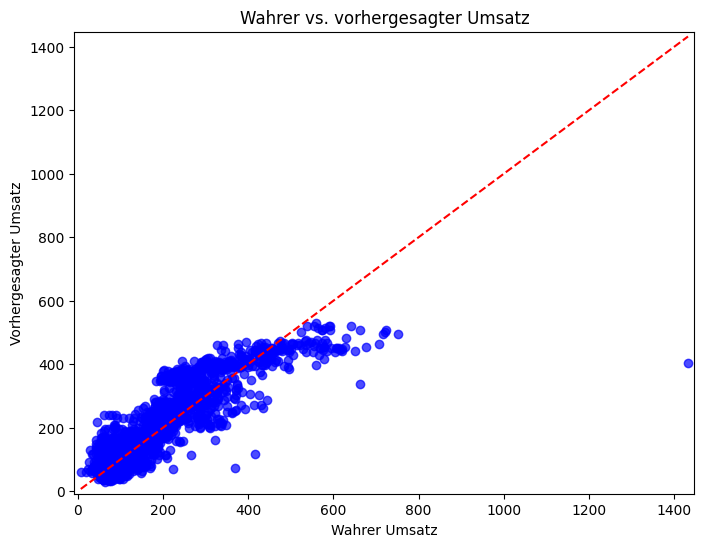

In [446]:
# Scatter plot: Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(df_umsatz_test.Umsatz, predictions2, alpha=0.7, color="blue")
plt.plot([df_umsatz_test.Umsatz.min(), df_umsatz_test.Umsatz.max()], [df_umsatz_test.Umsatz.min(), df_umsatz_test.Umsatz.max()], 'k--', color="red")

plt.xlim([df_umsatz_test.Umsatz.min()-15, df_umsatz_test.Umsatz.max()+15])
plt.ylim([df_umsatz_test.Umsatz.min()-15, df_umsatz_test.Umsatz.max()+15])

plt.xlabel("Wahrer Umsatz")
plt.ylabel("Vorhergesagter Umsatz")
plt.title("Wahrer vs. vorhergesagter Umsatz")
plt.show()

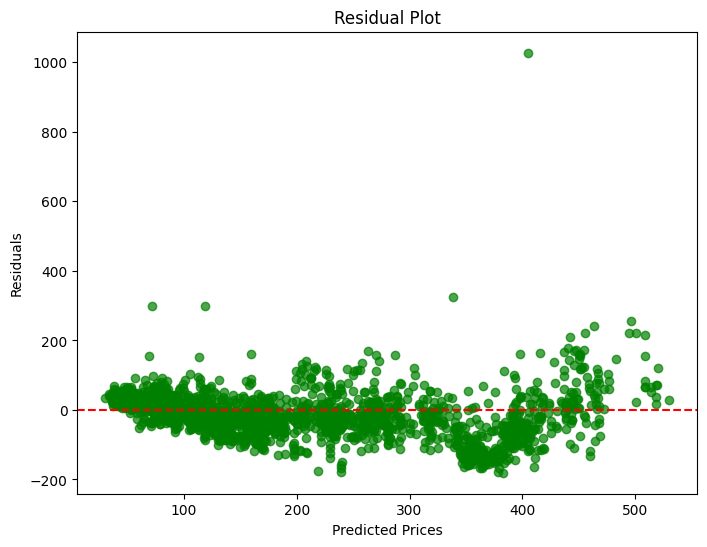

In [447]:
# Calculate residuals (differences between actual and predicted values)
residuals2 = df_umsatz_test["Umsatz"] - predictions2

# Residual plot: Predicted Prices vs. Residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions2, residuals2, alpha=0.7, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

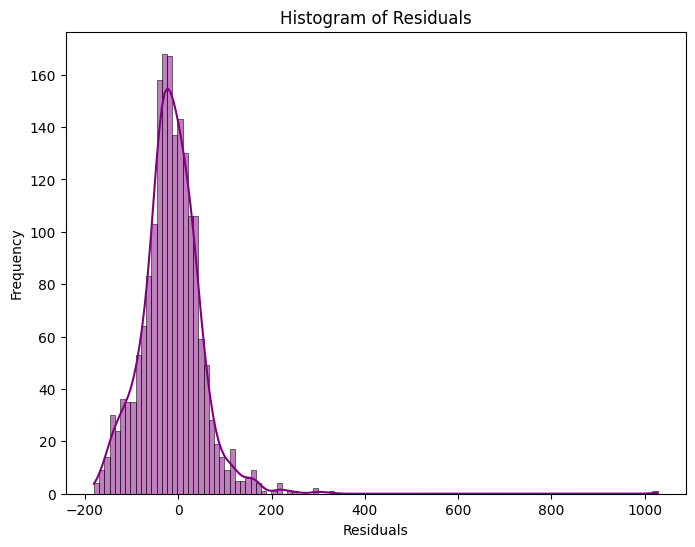

In [448]:
# Histogram of residuals to check normality
plt.figure(figsize=(8, 6))
sns.histplot(residuals2, kde=True, color="purple")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

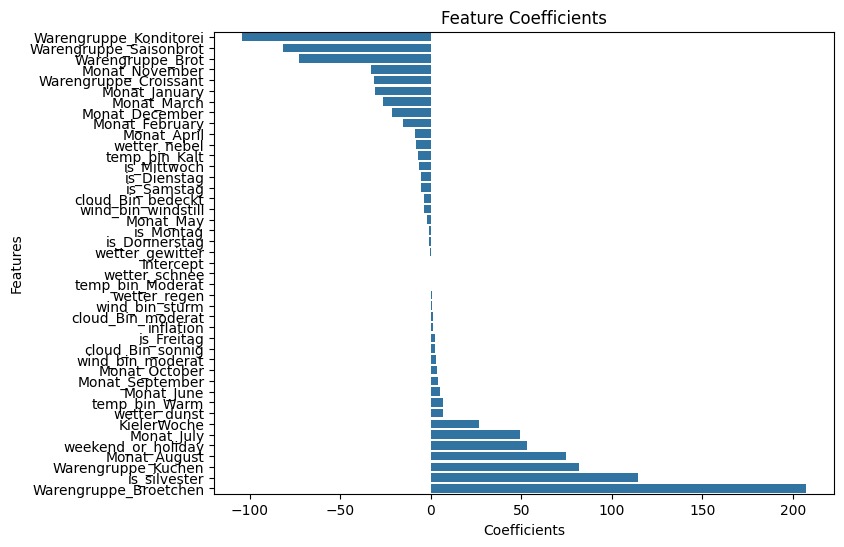

In [449]:
# Create a DataFrame of model coefficients
coefficients_ridge = pd.DataFrame({
    'Feature': ['Intercept'] + features,
    'Coefficient': best_model.coef_
})

# Bar plot of feature coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients_ridge.sort_values('Coefficient', ascending=True))
plt.title("Feature Coefficients")
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.show()

***Experimenting with different Models***

SGD Regressor

In [450]:
# Import necessary libraries
from sklearn.linear_model import SGDRegressor  # Stochastic Gradient Descent Regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Evaluation metrics
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Advanced visualizations
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets

In [451]:
# Train a Stochastic Gradient Descent (SGD) Regressor
# Parameters:
# - max_iter: Maximum number of iterations for training.
# - learning_rate: Type of learning rate schedule ('invscaling' decreases learning rate over time).
# - eta0: Initial learning rate.
sgd_model = SGDRegressor(max_iter=1000, learning_rate='invscaling', eta0=0.01, random_state=42)
sgd_model.fit(X_train, y_train)

# Make predictions on the test set
sgd_predictions = sgd_model.predict(X_test)
print("Predictions for test data:", sgd_predictions[:5])  # Display first 5 predictions

Predictions for test data: [184.02051341 182.7805873  181.27772777 189.25800639 236.79533119]


In [452]:
# Calculate error metrics
mae = mean_absolute_error(df_umsatz_test["Umsatz"], sgd_predictions)  # Mean Absolute Error
mse = mean_squared_error(df_umsatz_test["Umsatz"], sgd_predictions)  # Mean Squared Error
mape = (abs((df_umsatz_test["Umsatz"] - sgd_predictions) / df_umsatz_test["Umsatz"]).mean()) * 100  # Mean Absolute Percentage Error

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 48.74
Mean Squared Error (MSE): 4581.45
Mean Absolute Percentage Error (MAPE): 32.47%


In [453]:
def calc_adj_r2(y_true, y_pred, n_features):
    n = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - ((1-r2)*(n-1)/(n-n_features-1))
    return adj_r2

# Berechne adjusted R² für SGD Model
y_pred = sgd_model.predict(X_test)
adj_r2 = calc_adj_r2(df_umsatz_test["Umsatz"], y_pred, len(features))
print(f"Adjusted R² für SGD Model: {adj_r2:.4f}")

Adjusted R² für SGD Model: 0.7229


/tmp/ipykernel_3136/2317027441.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([df_umsatz_test["Umsatz"].min(), df_umsatz_test["Umsatz"].max()], [df_umsatz_test["Umsatz"].min(), df_umsatz_test["Umsatz"].max()], 'k--', color="red")


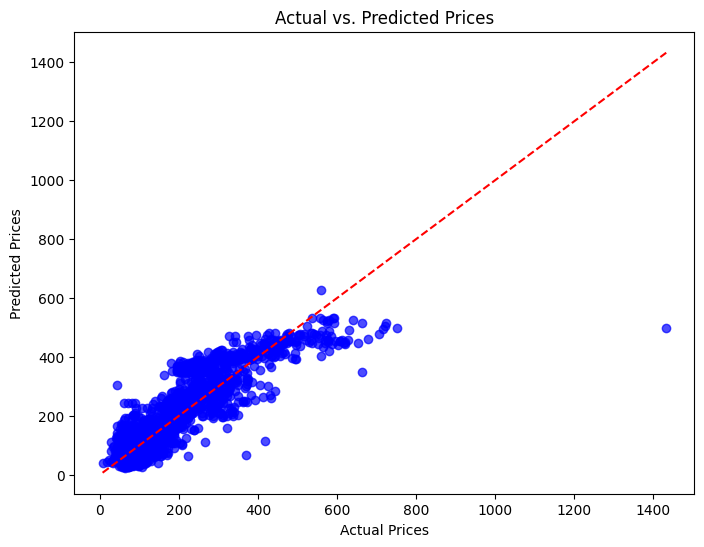

In [454]:
# Plot: Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(df_umsatz_test["Umsatz"], sgd_predictions, alpha=0.7, color="blue")
plt.plot([df_umsatz_test["Umsatz"].min(), df_umsatz_test["Umsatz"].max()], [df_umsatz_test["Umsatz"].min(), df_umsatz_test["Umsatz"].max()], 'k--', color="red")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

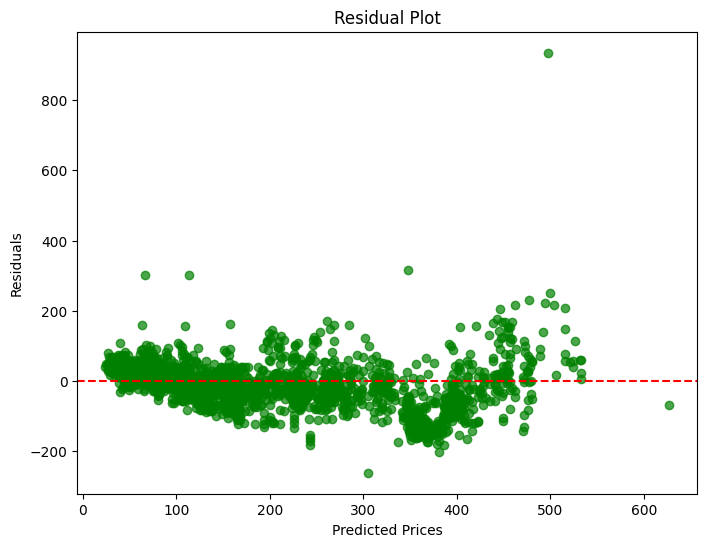

In [455]:

# Calculate residuals (differences between actual and predicted values)
residuals = df_umsatz_test["Umsatz"] - sgd_predictions

# Residual plot: Predicted Prices vs. Residuals
plt.figure(figsize=(8, 6))
plt.scatter(sgd_predictions, residuals, alpha=0.7, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

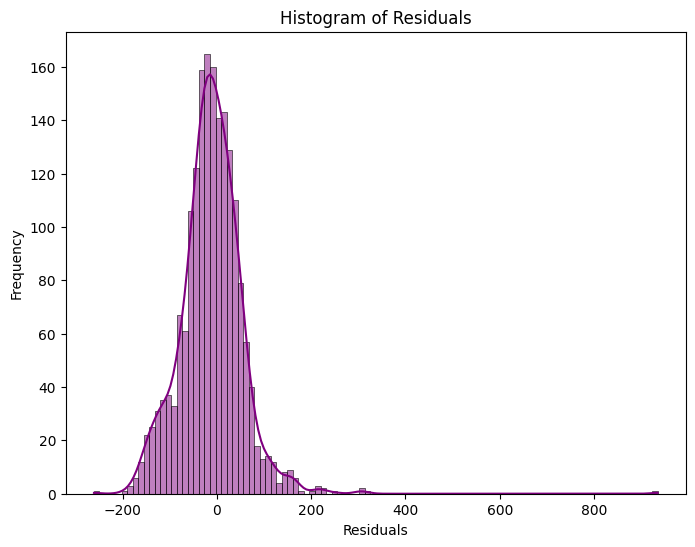

In [456]:
# Histogram of residuals to check distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="purple")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Shape-Überprüfung:
Features shape: 42
Coefficients shape: (43,)


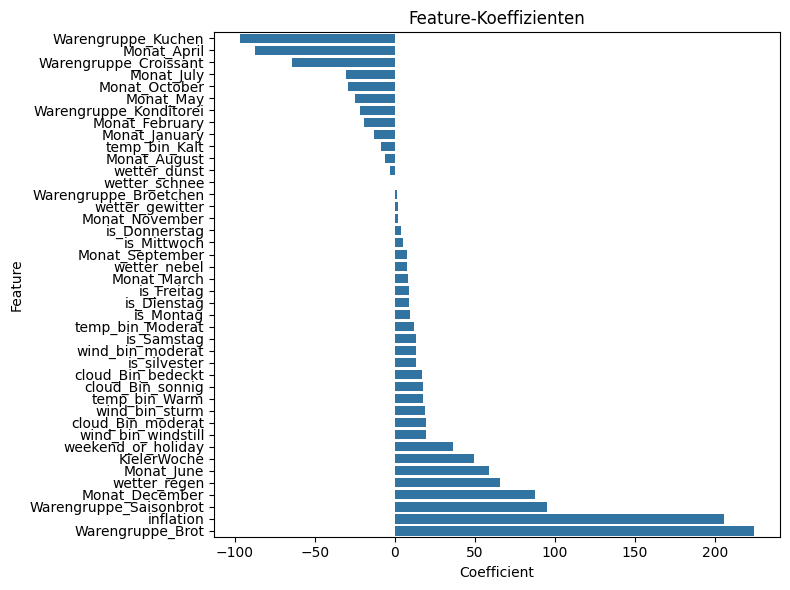

In [457]:
# Debug-Informationen
print("Shape-Überprüfung:")
print(f"Features shape: {len(features)}")
print(f"Coefficients shape: {sgd_model.coef_.shape}")

# Koeffizienten richtig extrahieren
if len(sgd_model.coef_.shape) > 1:
    coefficients_array = sgd_model.coef_.ravel()  # Flatten falls mehrdimensional
else:
    coefficients_array = sgd_model.coef_

# DataFrame mit übereinstimmenden Längen erstellen
coefficients_sgd = pd.DataFrame({
    'Feature': features[:len(coefficients_array)],
    'Coefficient': coefficients_array[:len(features)]
})

# Visualisierung
plt.figure(figsize=(8, 6))
sns.barplot(data=coefficients_sgd.sort_values('Coefficient', ascending=True), 
            y='Feature', 
            x='Coefficient')
plt.title('Feature-Koeffizienten')
plt.tight_layout()
plt.show()